In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [85]:
# 데이터 로드
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target

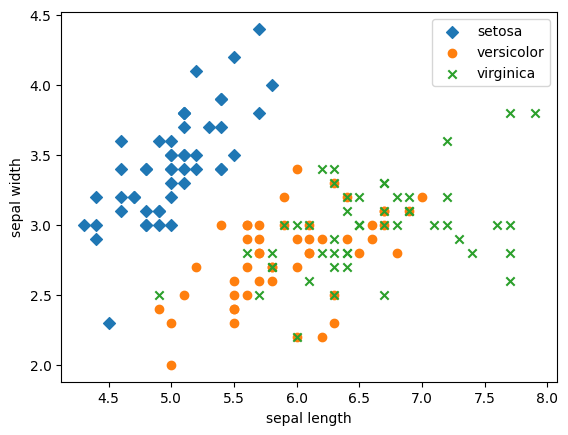

In [86]:
# 타겟 데이터 산점도
markers = ['D', 'o','x']
for i, marker in enumerate(markers):
    x = iris_df[iris_df['target'] == i]['sepal length (cm)']
    y = iris_df[iris_df['target'] == i]['sepal width (cm)']
    plt.scatter(x, y, marker=marker, label=iris_data.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

# PCA

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

# 데이터 로드
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target

pca = PCA(n_components=2) # n_components차원으로 차원 축소

X=iris_df.iloc[:,:-1] # 입력 데이터 추출

# PCA 차원 축소
pca.fit(X)
iris_pca=pca.transform(X)

# 차원 변화 확인
print(X.shape,iris_pca.shape)

# 축소 데이터 프레임 생성
iris_pca_df = pd.DataFrame(iris_pca, columns=['pca_col1', 'pca_col2'])
iris_pca_df['target'] = iris_data.target



(150, 4) (150, 2)


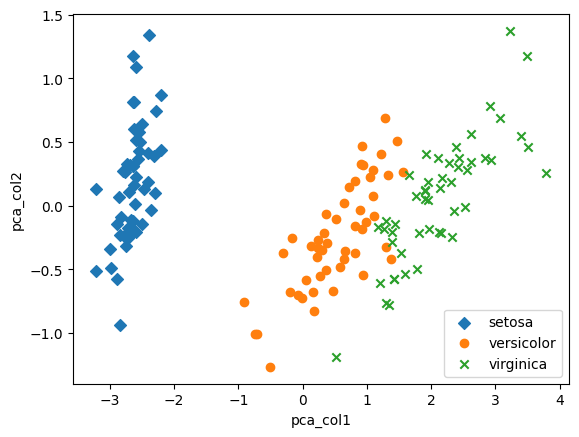

In [88]:
markers = ['D', 'o', 'x']

for i, marker in enumerate(markers):
    x = iris_pca_df[iris_pca_df['target'] == i]['pca_col1']
    y = iris_pca_df[iris_pca_df['target'] == i]['pca_col2']
    plt.scatter(x, y, marker=marker, label=iris_data.target_names[i])

plt.legend()
plt.xlabel('pca_col1')
plt.ylabel('pca_col2')
plt.show()

# LDA

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 데이터 로드
iris_data=load_iris()

lda=LinearDiscriminantAnalysis(n_components=2)  # n_components차원으로 차원 축소

# LDA 차원 축소
iris_lda=lda.fit_transform(iris_data.data,iris_data.target)

# 데이터 프레임 생성
iris_lda_df=pd.DataFrame(iris_lda,columns=['lda_col1','lda_col2'])

# 차원 축소 확인
print(X.shape,iris_lda_df.shape)

iris_lda_df['target']=iris_data.target

(150, 4) (150, 2)


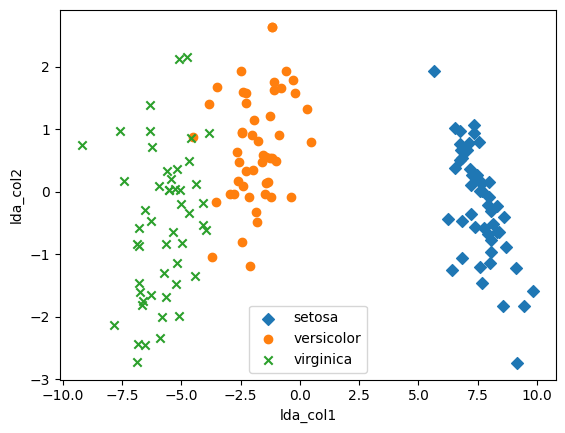

In [90]:
markers = ['D', 'o', 'x']

for i, marker in enumerate(markers):
    x = iris_lda_df[iris_lda_df['target'] == i]['lda_col1']
    y = iris_lda_df[iris_lda_df['target'] == i]['lda_col2']
    plt.scatter(x, y, marker=marker, label=iris_data.target_names[i])

plt.legend()
plt.xlabel('lda_col1')
plt.ylabel('lda_col2')
plt.show()

# LLE

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import LocallyLinearEmbedding

iris_data=load_iris()

# LLE 차원 축소
lle=LocallyLinearEmbedding(n_components=2,n_neighbors=10) # n_components차원으로 차원 축소, n_neighbors 이웃 수
iris_lle=lle.fit_transform(iris_data.data)

# 데이터 프레임 변환
iris_lle_df=pd.DataFrame(iris_lle,columns=['lle_col1','lle_col2'])

# 차원 축소 확인
print(X.shape,iris_lle_df.shape)

iris_lle_df['target']=iris_data.target

(150, 4) (150, 2)


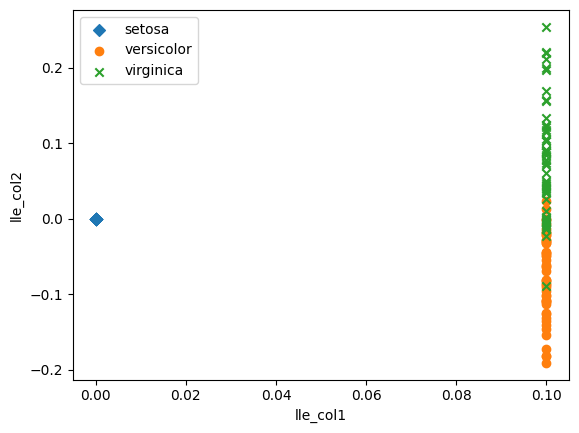

In [92]:
markers = ['D', 'o', 'x']

for i, marker in enumerate(markers):
    x = iris_lle_df[iris_lle_df['target'] == i]['lle_col1']
    y = iris_lle_df[iris_lle_df['target'] == i]['lle_col2']
    plt.scatter(x, y, marker=marker, label=iris_data.target_names[i])

plt.legend()
plt.xlabel('lle_col1')
plt.ylabel('lle_col2')
plt.show()

### 비선형 데이터 LLE

(300, 3) (300, 2)


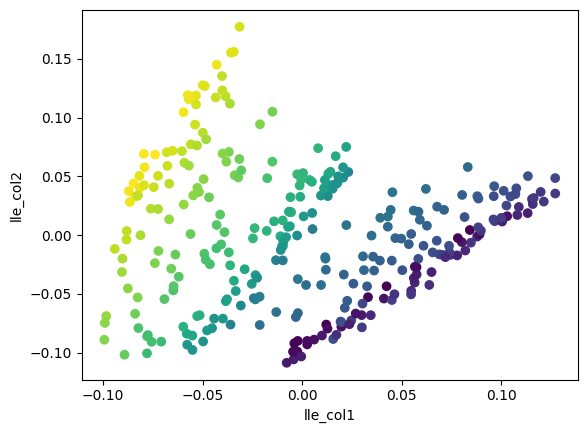

In [93]:
from sklearn.datasets import make_s_curve
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt
import pandas as pd

# 비선형 데이터 생성 (S-curve 데이터)
X, y = make_s_curve(n_samples=300, noise=0.1, random_state=42)

# LLE 차원 축소
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)  # n_components차원으로 차원 축소, n_neighbors 이웃 수
X_lle = lle.fit_transform(X)

# 데이터 프레임 변환
X_lle_df = pd.DataFrame(X_lle, columns=['lle_col1', 'lle_col2'])

# 차원 축소 확인
print(X.shape, X_lle_df.shape)

X_lle_df['target'] = y

plt.scatter(X_lle_df['lle_col1'], X_lle_df['lle_col2'], c=X_lle_df['target'])

plt.legend
plt.xlabel('lle_col1')
plt.ylabel('lle_col2')
plt.show()
